In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [9]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Iris Dataset:")
print(data.head())


Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [10]:
# Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Combined Normalization + PCA
normalized_pca_data = pca.fit_transform(normalized_data)


In [11]:
# Define clustering algorithms
n_clusters = [3, 4, 5]  # Number of clusters to test
results = []

for n in n_clusters:
    for preprocessing, dataset in [
        ("No Preprocessing", data.values),
        ("Normalization", normalized_data),
        ("PCA", pca_data),
        ("Normalization + PCA", normalized_pca_data),
    ]:
        # Apply K-Means Clustering
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans_labels = kmeans.fit_predict(dataset)

        # Apply Agglomerative Clustering (Hierarchical)
        hierarchical = AgglomerativeClustering(n_clusters=n)
        hierarchical_labels = hierarchical.fit_predict(dataset)

        # Apply Mean-Shift Clustering
        mean_shift = MeanShift()
        mean_shift_labels = mean_shift.fit_predict(dataset)

        # Evaluate using metrics
        for algorithm, labels in [
            ("K-Means", kmeans_labels),
            ("Hierarchical", hierarchical_labels),
            ("Mean-Shift", mean_shift_labels),
        ]:
            silhouette = silhouette_score(dataset, labels)
            calinski = calinski_harabasz_score(dataset, labels)
            davies = davies_bouldin_score(dataset, labels)

            # Append results
            results.append({
                "Clusters": n,
                "Preprocessing": preprocessing,
                "Algorithm": algorithm,
                "Silhouette Score": round(silhouette, 2),
                "Calinski-Harabasz": round(calinski, 2),
                "Davies-Bouldin": round(davies, 2)
            })


In [12]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Clustering Performance Results:")
print(results_df)

# Save results to a CSV file
results_df.to_csv("clustering_results.csv", index=False)


Clustering Performance Results:
    Clusters        Preprocessing     Algorithm  Silhouette Score  \
0          3     No Preprocessing       K-Means              0.55   
1          3     No Preprocessing  Hierarchical              0.55   
2          3     No Preprocessing    Mean-Shift              0.69   
3          3        Normalization       K-Means              0.48   
4          3        Normalization  Hierarchical              0.45   
5          3        Normalization    Mean-Shift              0.58   
6          3                  PCA       K-Means              0.60   
7          3                  PCA  Hierarchical              0.60   
8          3                  PCA    Mean-Shift              0.71   
9          3  Normalization + PCA       K-Means              0.52   
10         3  Normalization + PCA  Hierarchical              0.51   
11         3  Normalization + PCA    Mean-Shift              0.61   
12         4     No Preprocessing       K-Means              0.50   
13

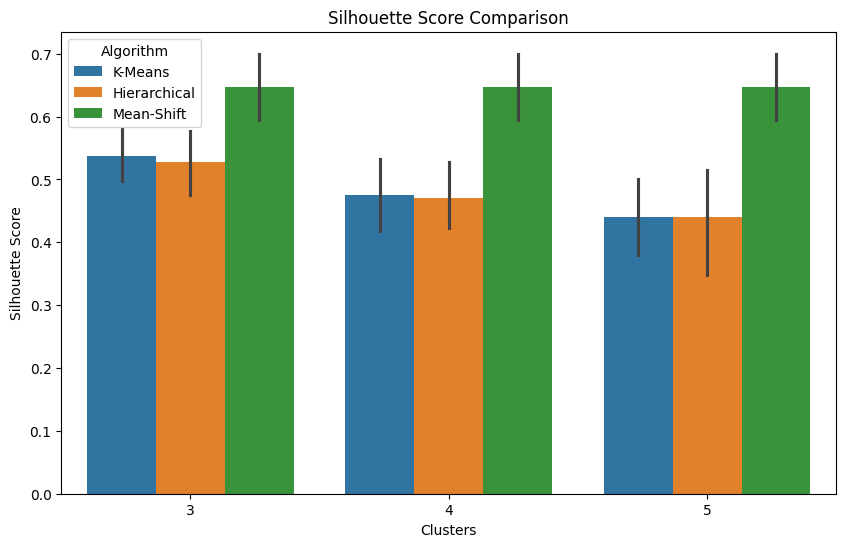

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualize Silhouette Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Clusters", y="Silhouette Score", hue="Algorithm")
plt.title("Silhouette Score Comparison")
plt.show()


In [14]:
results_df.to_csv("clustering_results.csv", index=False)
